<a href="https://colab.research.google.com/github/Razaqa-Aliskar/Cancer-Mortality-Prediction/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Razaqa Aliskar

Peer Reviewer: Imara Riyal

# Importing Data

In [72]:
import pandas as pd
import plotly.express as px
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Initiating the variable df with the dataset
df=pd.read_csv('5DATA002W.2 Coursework Dataset(25012025v6.0).csv')

## Data Understanding

In [74]:
df.head(10)

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive
5,A0017,2,51.0,Female,Research,T1,N1,IIA,Moderately differentiated,2,Regional,20.0,Positive,Positive,18.0,2,89,Alive
6,A0018,5,51.0,Female,House Person,T1,N1,IIA,Well differentiated,1,Regional,8.0,Positive,Positive,11.0,1,54,Alive
7,A0019,4,40.0,Female,Reporting,T2,N1,IIB,Moderately differentiated,2,Regional,30.0,Positive,Positive,9.0,1,14,Dead
8,A0020,6,40.0,Female,Development,T4,N3,IIIC,Poorly differentiated,3,Regional,103.0,Positive,Positive,20.0,18,70,Alive
9,A0021,4,69.0,Female,Construction,T4,N3,IIIC,Well differentiated,1,Distant,32.0,Positive,Positive,21.0,12,92,Alive


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

In [76]:
list(df.columns)

['Patient_ID',
 'Month_of_Birth',
 'Age',
 'Sex',
 'Occupation',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months',
 'Mortality_Status']

In [77]:
df.shape

(4024, 18)

In [78]:
#Statistical details of numerical variables
df.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


In [79]:
#Statistical details of categorical variables
df.describe(include='object')

,Patient_ID,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4024,4020,43,4024,4024,4024,4024,4024,4024,4024,4024
unique,4024,2,40,4,3,5,4,2,2,2,7
top,A4035,Female,House Person,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,1,4001,2,1786,2732,1305,2351,3932,3755,3326,3399


In [80]:
#Unique values of each variable
for column in ['Patient_ID', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status', 'Mortality_Status']:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Patient_ID': ['A0012' 'A0013' 'A0014' ... 'A4033' 'A4034' 'A4035']
Unique values in column 'Sex': ['Female' '1' nan]
Unique values in column 'Occupation': ['Teaching' 'Medical' 'Engineering' 'Technology' 'Multimedia' 'Research'
 'House Person' 'Reporting' 'Development' 'Construction' 'Leisure'
 'Scoial work' 'Trading' 'Consultancy' 'Driving' 'Planning' 'Hospitality'
 'Travel' 'Agriculture' 'Manufacturing' 'Photography' 'Finance' 'Business'
 'Marketing' 'Training' 'Cleaning' 'Legal' 'Healthcare' 'Military' 'Sales'
 'Entertainment' 'Sports' 'Arts' 'Design' 'Maintenance' 'Management'
 'Human Resources' 'Administrative' 'Public' 'Politics' nan]
Unique values in column 'T_Stage': ['T1' 'T2' 'T3' 'T4']
Unique values in column 'N_Stage': ['N1' 'N2' 'N3']
Unique values in column '6th_Stage': ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Unique values in column 'Differentiated': ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Unique 

# Data Preparation

In [81]:
#Finding missing values
df.isnull().sum()

,0
Patient_ID,0
Month_of_Birth,0
Age,9
Sex,4
Occupation,3981
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0


In [82]:
#Dropping irrelevant columns
df=df.drop(columns=(['Occupation', 'Sex','Patient_ID','Month_of_Birth']))

In [83]:
df.head(5)

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,50.0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,58.0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,58.0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,47.0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [84]:
#Fixing inconsistent values
df['Mortality_Status'].replace(['dead', 'dead','DEAD'],'Dead',inplace=True)
df['Mortality_Status'].replace(['alive', 'Alive','ALIVE','ALive'],'Alive',inplace=True)

<ipython-input-84-fd7b9a87d6f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mortality_Status'].replace(['dead', 'dead','DEAD'],'Dead',inplace=True)


In [85]:
df['Mortality_Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [86]:
#rename reginol_node_positive to regional_node_positive
df.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

In [87]:
#Python method to perform mean imputation for your chosen variable.
# List of columns to impute
columns_to_impute = ['Age', 'Tumor_Size', 'Regional_Node_Examined']

# Loop through each column and perform mean imputation
for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

<ipython-input-87-ed0793a93e96>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


In [88]:
#Dropping the null values in the age column
df.dropna(subset=['Age'], inplace=True)

In [89]:
#Missing values after removing and imputing
df.isnull().sum()

,0
Age,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0
Progesterone_Status,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   T_Stage                 4024 non-null   object 
 2   N_Stage                 4024 non-null   object 
 3   6th_Stage               4024 non-null   object 
 4   Differentiated          4024 non-null   object 
 5   Grade                   4024 non-null   int64  
 6   A_Stage                 4024 non-null   object 
 7   Tumor_Size              4024 non-null   float64
 8   Estrogen_Status         4024 non-null   object 
 9   Progesterone_Status     4024 non-null   object 
 10  Regional_Node_Examined  4024 non-null   float64
 11  Regional_Node_Positive  4024 non-null   int64  
 12  Survival_Months         4024 non-null   int64  
 13  Mortality_Status        4024 non-null   object 
dtypes: float64(3), int64(3), object(8)
memor

In [91]:
df[df.duplicated(keep=False)]

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
213,63.0,T1,N1,IIA,Moderately differentiated,2,Regional,17.0,Positive,Positive,9.0,1,56,Alive
436,63.0,T1,N1,IIA,Moderately differentiated,2,Regional,17.0,Positive,Positive,9.0,1,56,Alive


In [92]:
#Initiating the label encoder
label_encoder = preprocessing.LabelEncoder()

In [93]:
#Encoding the variables for easier analysis
columns_to_encode = ['Estrogen_Status', 'Progesterone_Status', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'A_Stage','Mortality_Status','Age','Tumor_Size','Regional_Node_Examined']

# Loop through each column and apply label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   T_Stage                 4024 non-null   int64
 2   N_Stage                 4024 non-null   int64
 3   6th_Stage               4024 non-null   int64
 4   Differentiated          4024 non-null   int64
 5   Grade                   4024 non-null   int64
 6   A_Stage                 4024 non-null   int64
 7   Tumor_Size              4024 non-null   int64
 8   Estrogen_Status         4024 non-null   int64
 9   Progesterone_Status     4024 non-null   int64
 10  Regional_Node_Examined  4024 non-null   int64
 11  Regional_Node_Positive  4024 non-null   int64
 12  Survival_Months         4024 non-null   int64
 13  Mortality_Status        4024 non-null   int64
dtypes: int64(14)
memory usage: 440.3 KB


In [95]:
df.head(5)

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,40,0,0,0,1,3,1,4,1,1,24,1,60,0
1,21,1,1,2,0,2,1,36,1,1,13,5,62,0
2,30,2,2,4,0,2,1,64,1,1,13,7,75,0
3,30,0,0,0,1,3,1,18,1,1,1,1,84,0
4,18,1,0,1,1,3,1,42,1,1,2,1,50,0


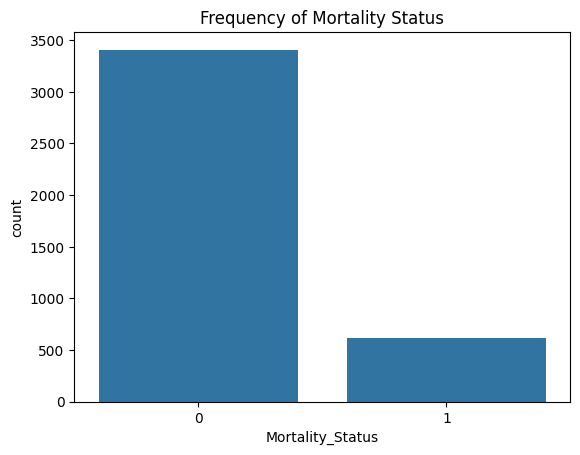

In [96]:
# Frequency of each mortality status
fig = sns.countplot(df, x="Mortality_Status")
plt.title("Frequency of Mortality Status")
plt.show()

# Dealing with Outliers

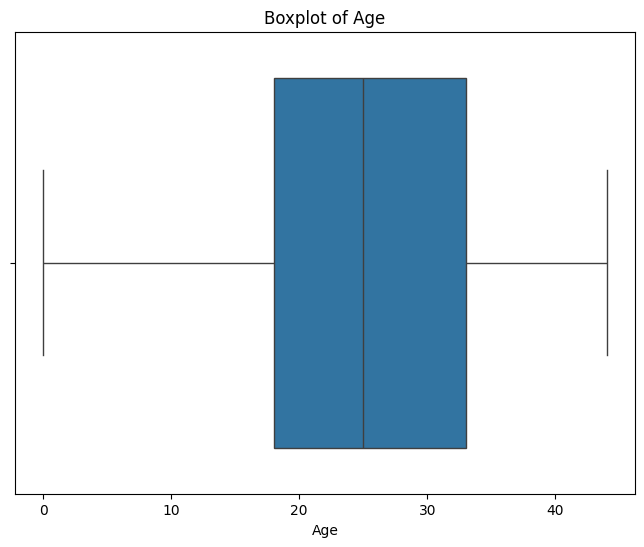

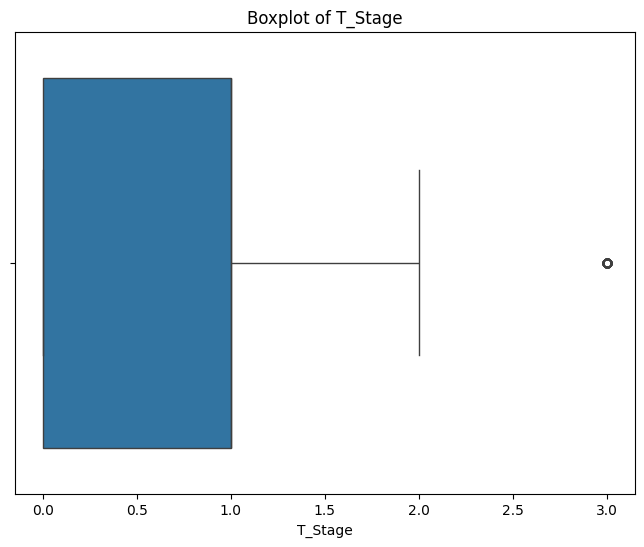

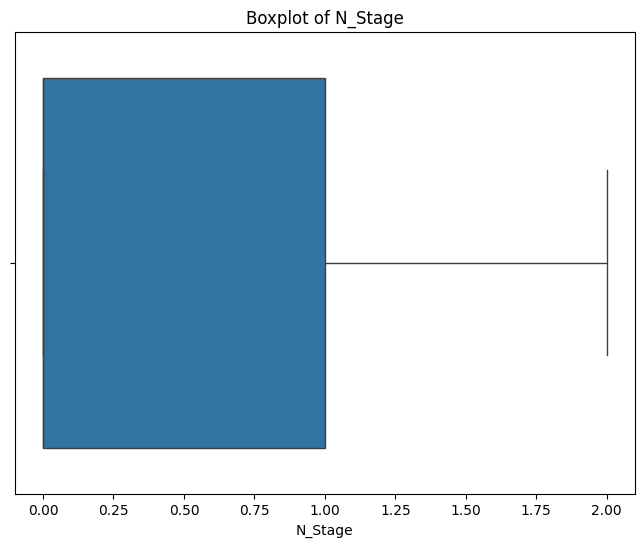

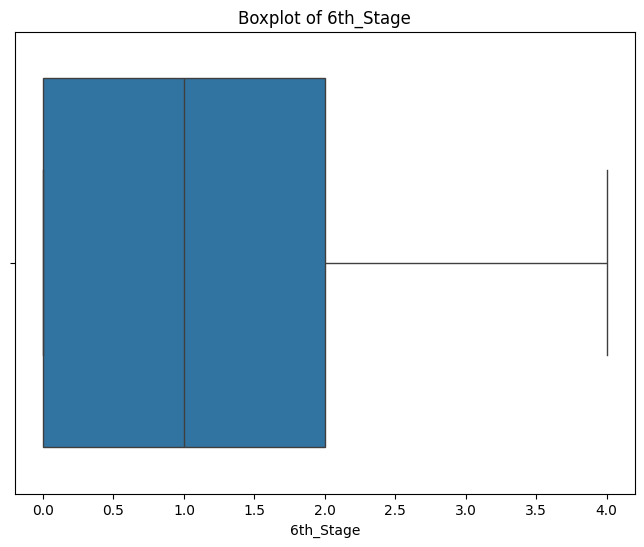

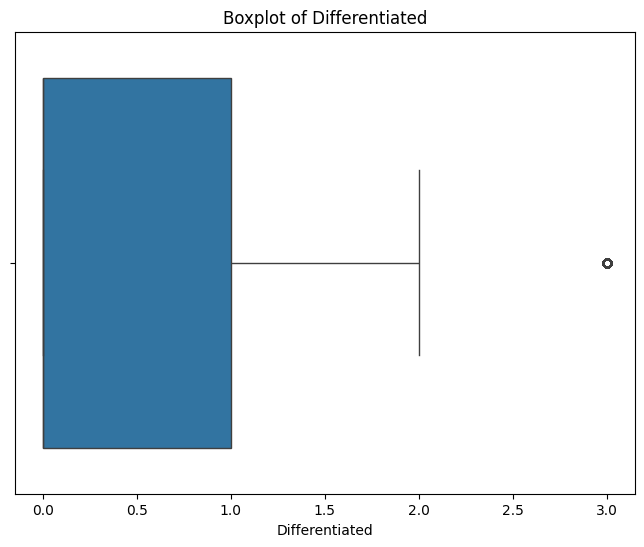

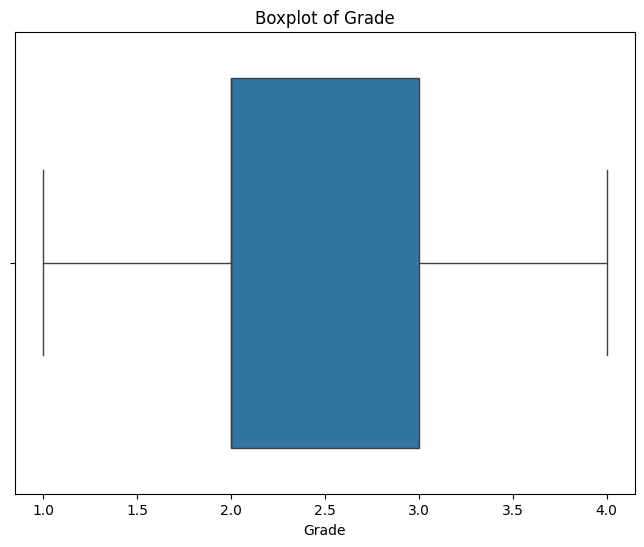

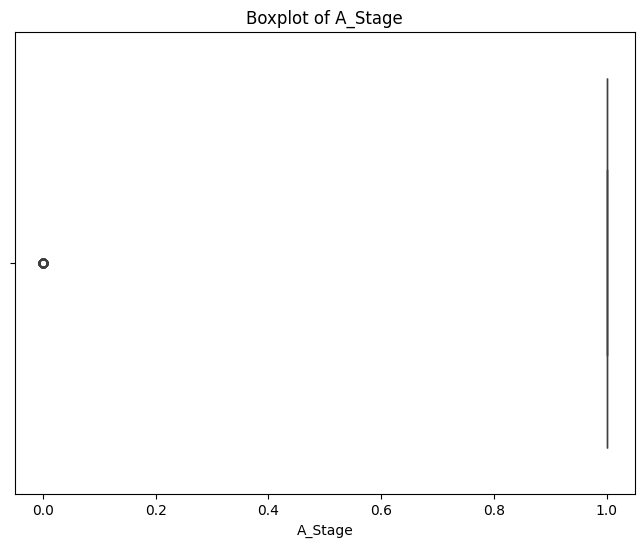

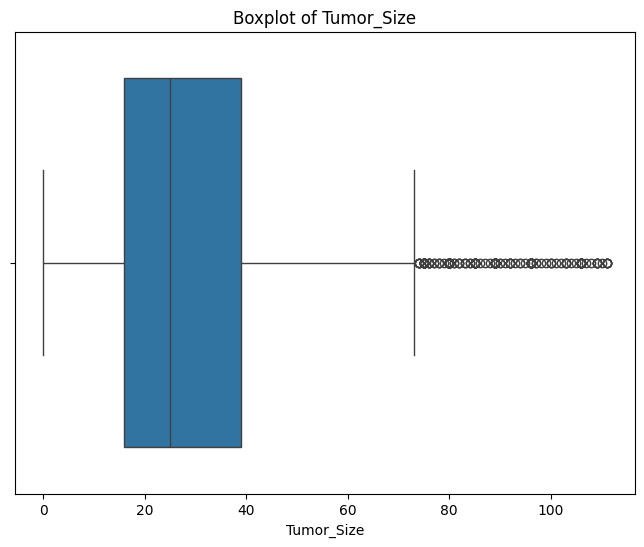

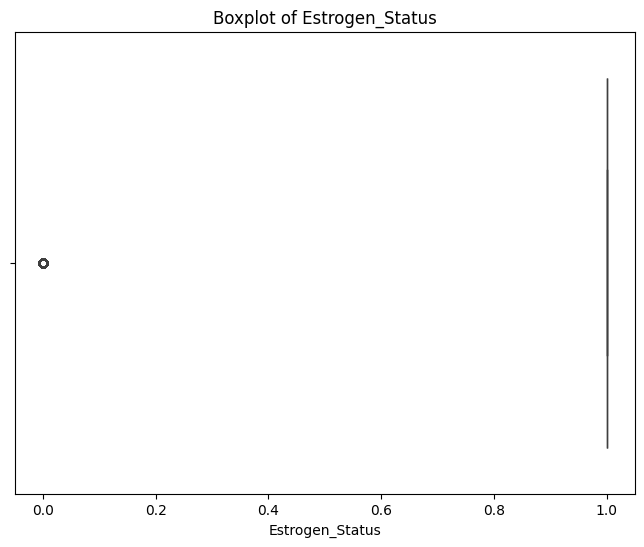

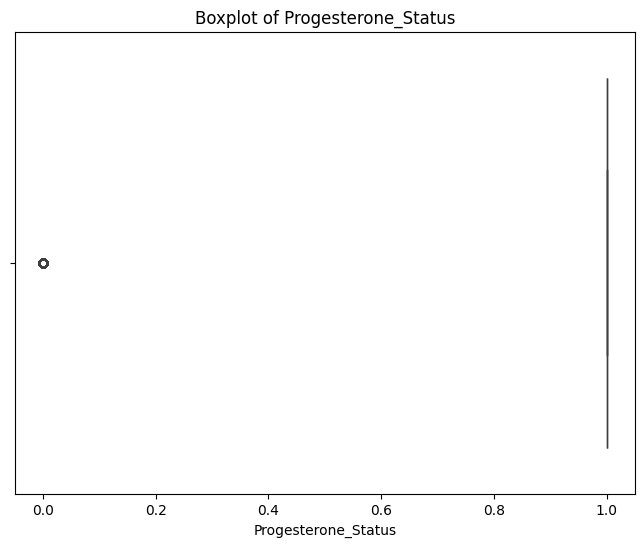

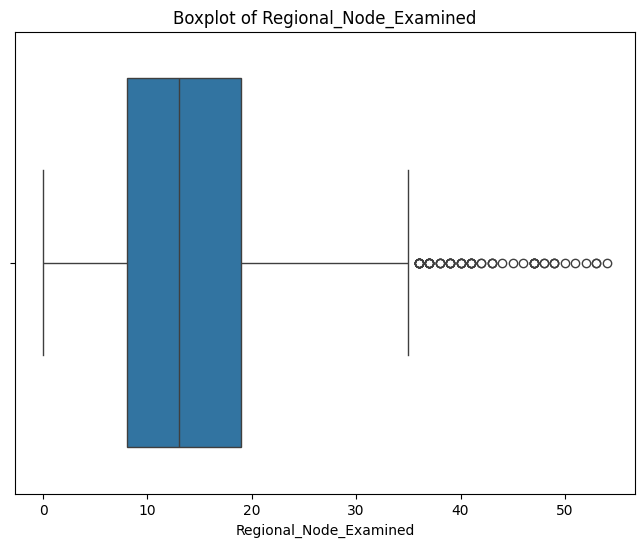

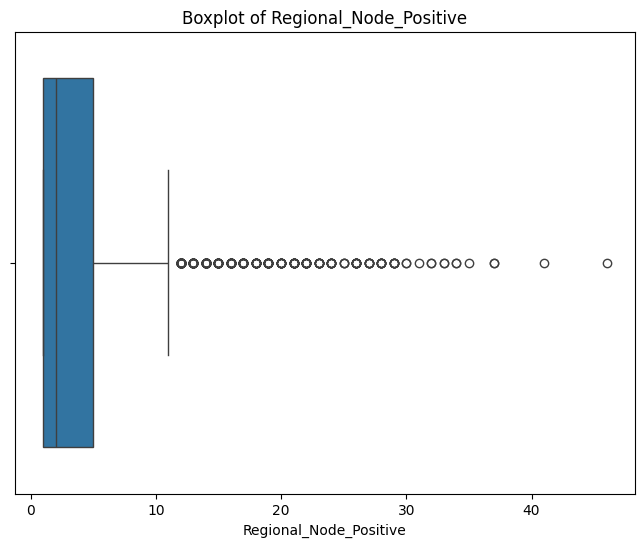

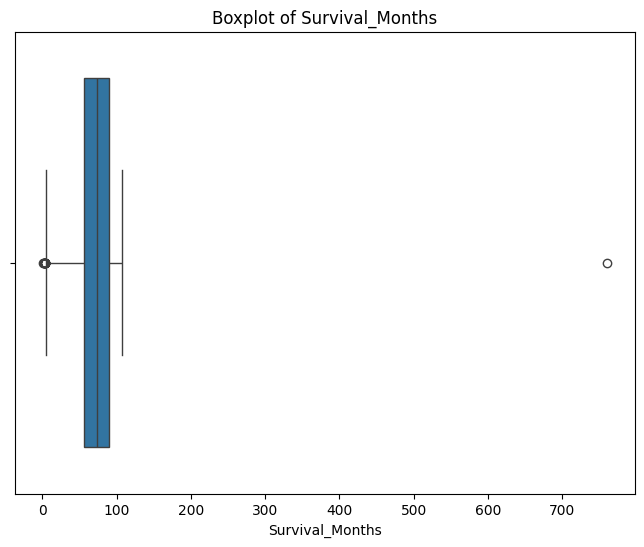

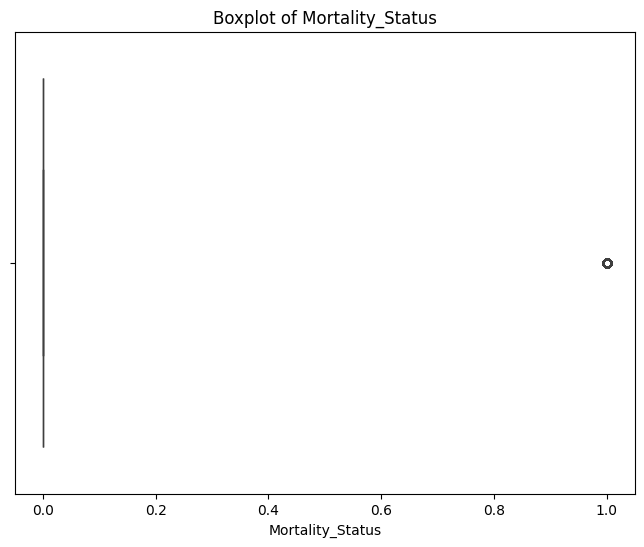

In [97]:
#Box plots to show the outliers in each column
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

In [98]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [99]:
#Finding the outliers in the age column
outliers = find_outliers_IQR(df['Age'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,Age


In [100]:
#remove rows 142,212,522 from Age column
df = df.drop(index=[142,212,522])

In [101]:
#Finding the outliers in the age column
outliers = find_outliers_IQR(df['Age'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,Age


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4021 non-null   int64
 1   T_Stage                 4021 non-null   int64
 2   N_Stage                 4021 non-null   int64
 3   6th_Stage               4021 non-null   int64
 4   Differentiated          4021 non-null   int64
 5   Grade                   4021 non-null   int64
 6   A_Stage                 4021 non-null   int64
 7   Tumor_Size              4021 non-null   int64
 8   Estrogen_Status         4021 non-null   int64
 9   Progesterone_Status     4021 non-null   int64
 10  Regional_Node_Examined  4021 non-null   int64
 11  Regional_Node_Positive  4021 non-null   int64
 12  Survival_Months         4021 non-null   int64
 13  Mortality_Status        4021 non-null   int64
dtypes: int64(14)
memory usage: 471.2 KB


In [103]:
df.to_csv('Cancer_Survival_Months__Dataset.csv', index=False)

In [104]:
#make a dataset without survival months column
df1=df.drop(columns=['Survival_Months'])
df1.to_csv('Cancer_Mortality_Status_Dataset.csv', index=False)